In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,659 cases (7 day average) as of Mon 17 May, +12.6 since Sun 16 May
76 hospitalised (7 day average) as of Wed 19 May, +0.0 since Tue 18 May
6 died (7 day average) as of Mon 17 May, -0.4 since Sun 16 May


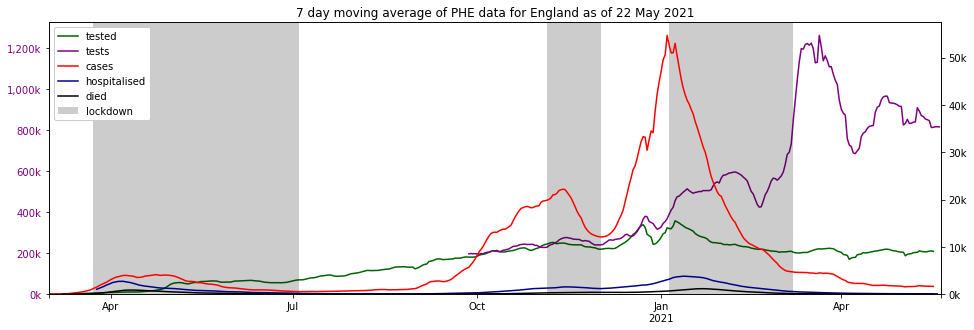

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

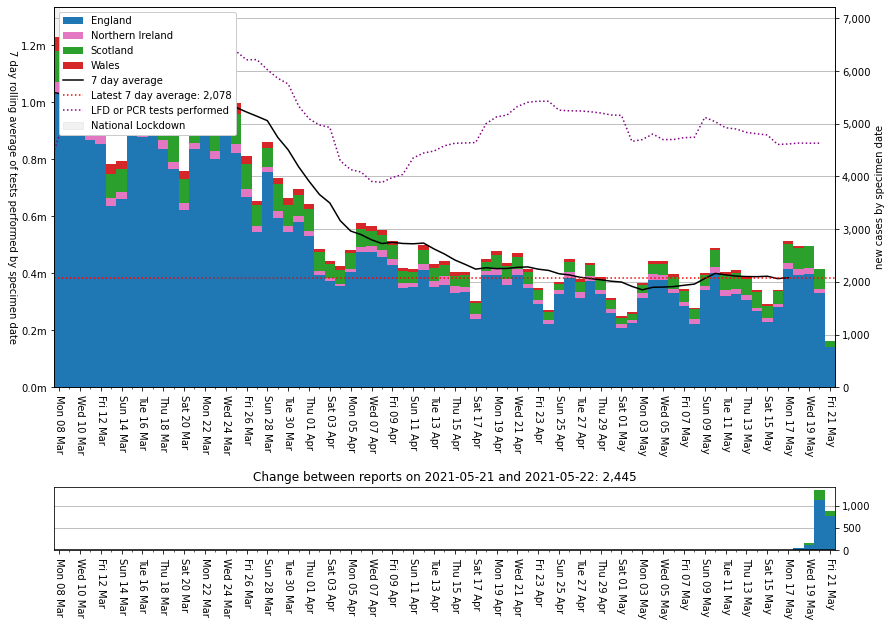

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

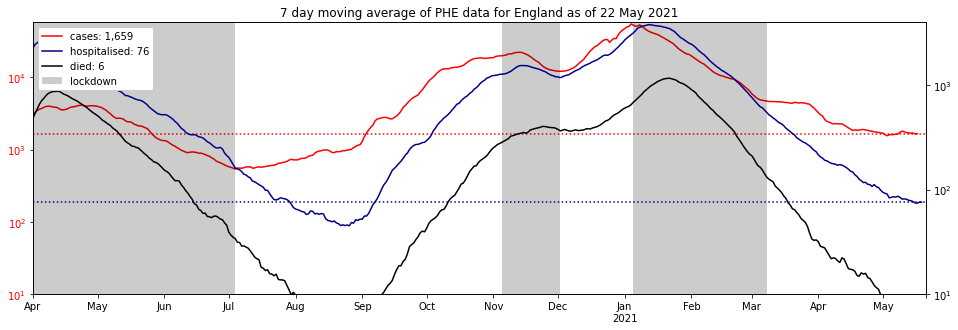

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

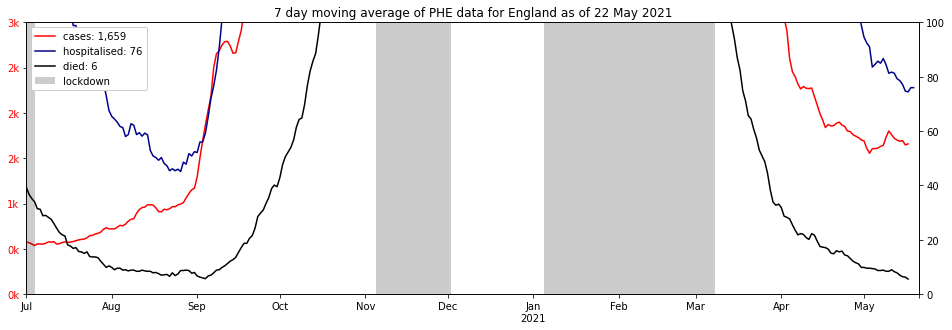

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,21 May 21,"+18,699,556","+31,546,846","+18,699,556","+371,460","+192,008","+371,460"
Northern Ireland,21 May 21,"+602,303","+1,014,048","+602,303","+9,338","+2,212","+9,338"
Scotland,21 May 21,"+1,799,956","+3,096,341","+1,799,956","+30,916","+14,090","+30,916"
Wales,21 May 21,"+969,682","+2,069,689","+969,682",+0,+0,+0


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,18699556.0,31546846.0,12847290.0,56286961,33.221826,22.824629,43.953545
1,Northern Ireland,N92000002,602303.0,1014048.0,411745.0,1893667,31.806173,21.743263,46.450564
2,Scotland,S92000003,1799956.0,3096341.0,1296385.0,5463300,32.946314,23.728973,43.324712
3,Wales,W92000004,969682.0,2069689.0,1100007.0,3152879,30.755446,34.888970,34.355584


'partial: 37,726,924 (56.5%), full: 22,071,497'

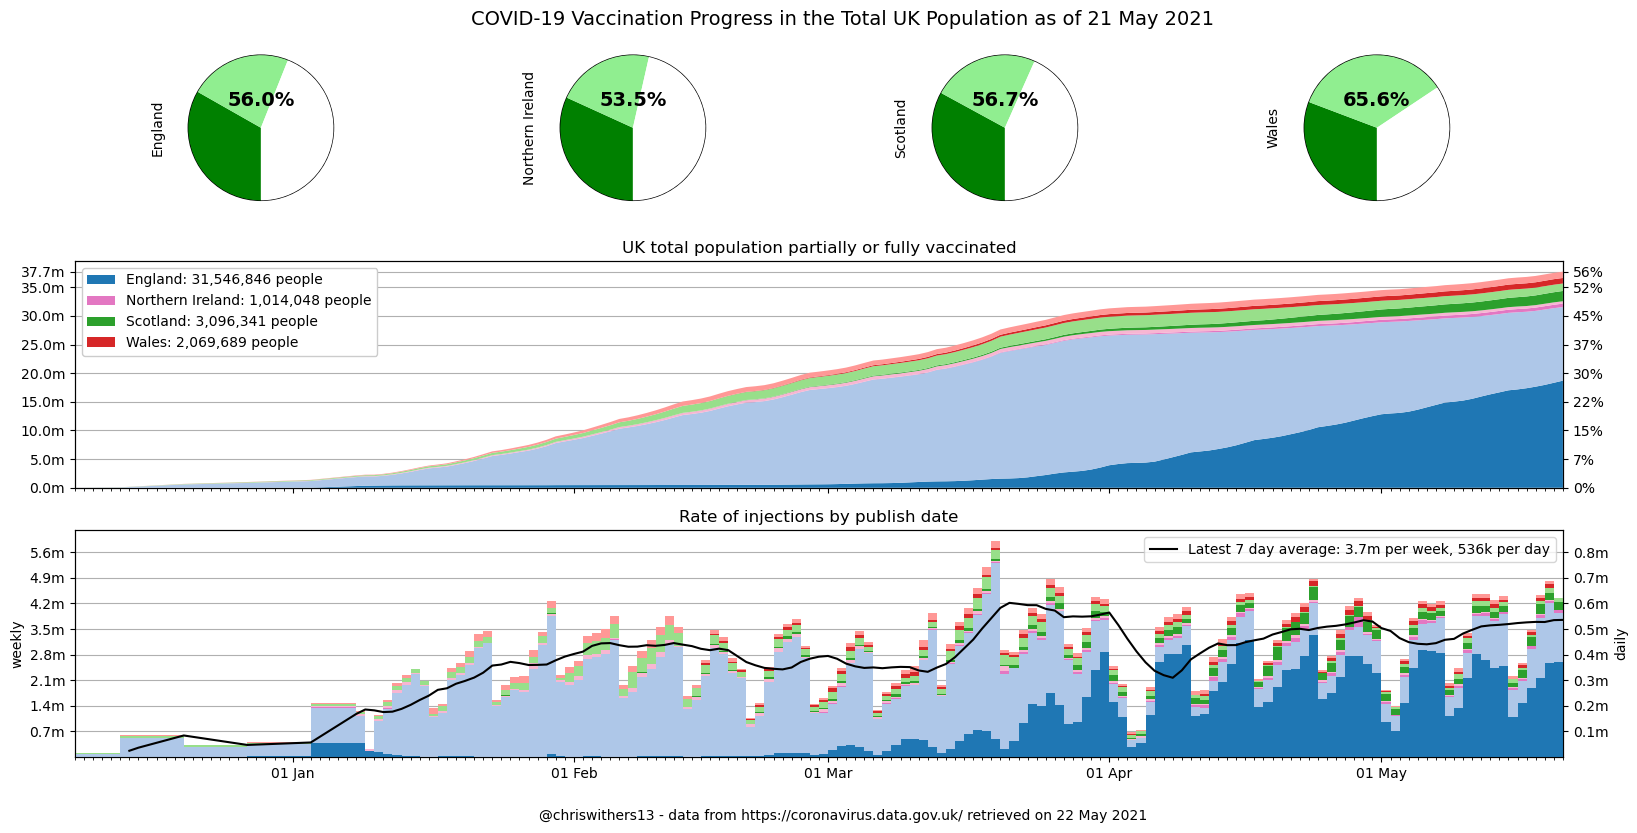

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

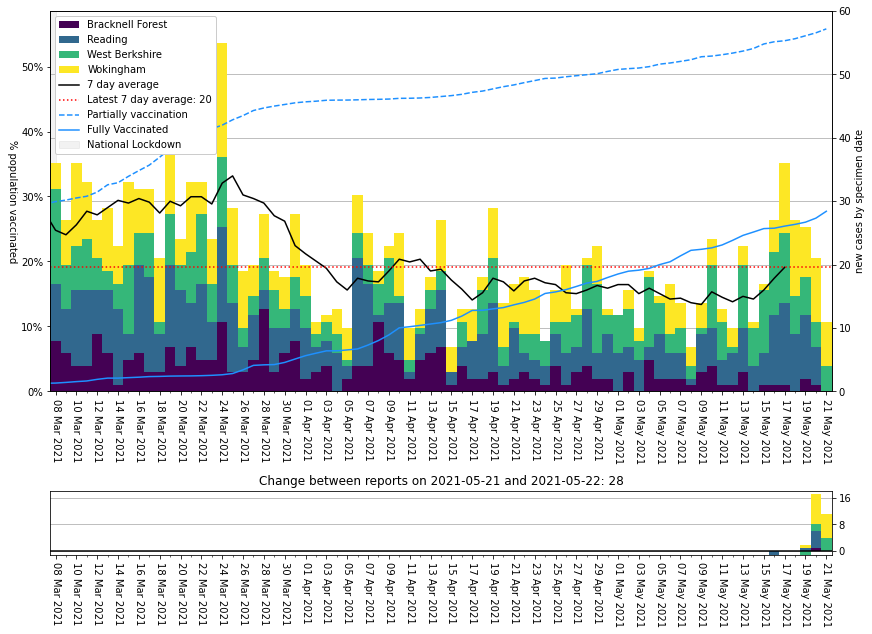

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], ylim=60,  lines=population_vaccinated)

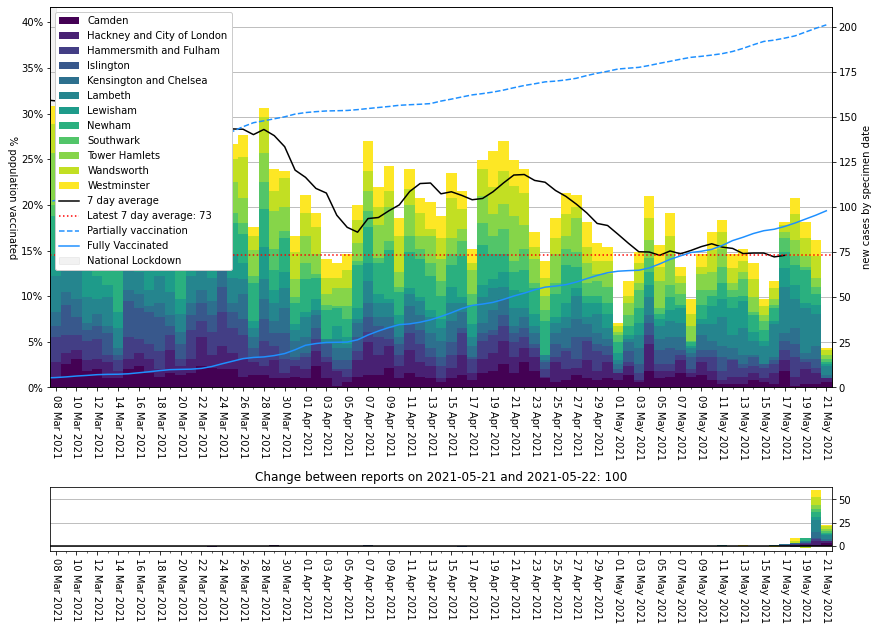

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,411.754477,1184.0,2021-05-21
E06000008,Blackburn with Darwen,259.859983,389.0,2021-05-21
E06000055,Bedford,172.541144,299.0,2021-05-21
S12000005,Clackmannanshire,131.936360,68.0,2021-05-21
S12000049,Glasgow City,120.198383,761.0,2021-05-21
S12000011,East Renfrewshire,105.725950,101.0,2021-05-21
E08000034,Kirklees,93.681714,412.0,2021-05-21
E07000125,Rossendale,89.533029,64.0,2021-05-21
S12000019,Midlothian,68.137573,63.0,2021-05-21


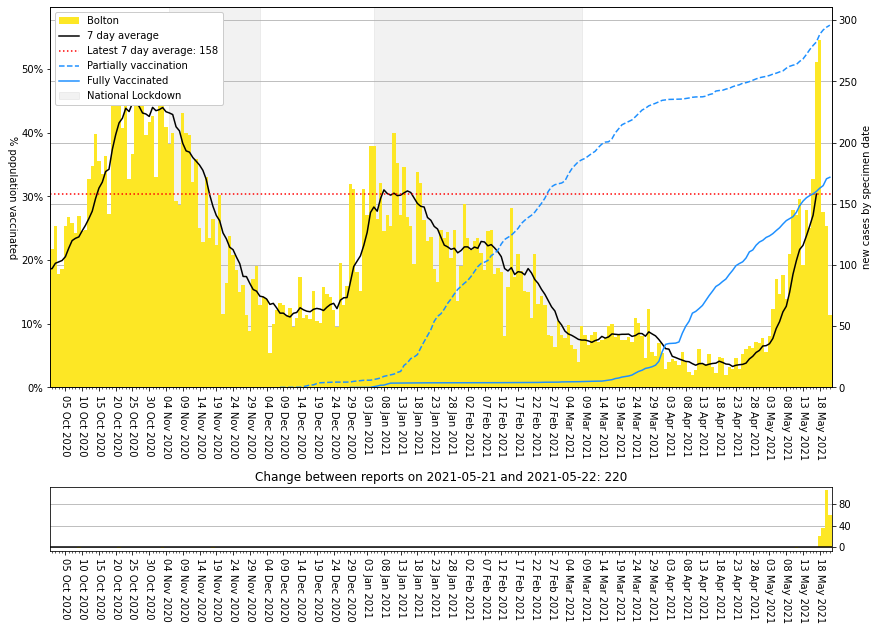

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,411.754477,1184.0,2021-05-21
S12000049,Glasgow City,120.198383,761.0,2021-05-21
E08000034,Kirklees,93.681714,412.0,2021-05-21
E06000008,Blackburn with Darwen,259.859983,389.0,2021-05-21
E08000003,Manchester,55.529630,307.0,2021-05-21
E06000055,Bedford,172.541144,299.0,2021-05-21
E08000035,Leeds,36.059253,286.0,2021-05-21
E08000032,Bradford,47.056557,254.0,2021-05-21
E08000025,Birmingham,21.632207,247.0,2021-05-21


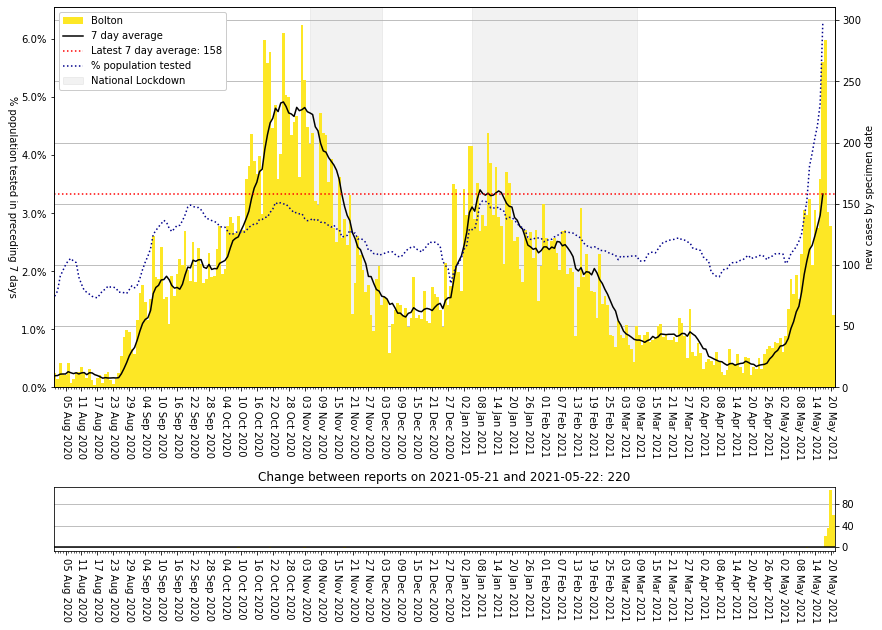

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested, earliest='2020-08')

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

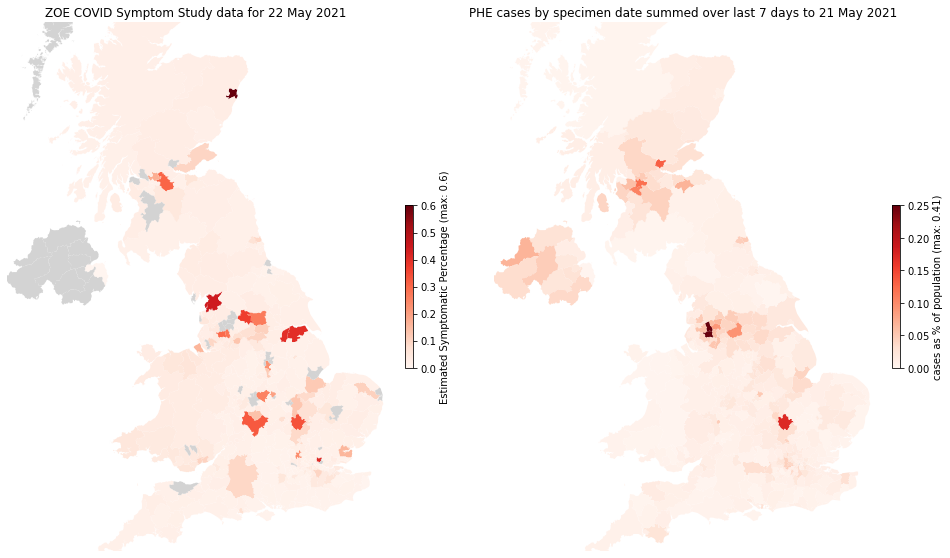

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...